In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import confidence_ellipse # add confidence ellipses to charts

In [2]:
data = pd.read_csv('bayes_features.csv')
data.head()

positive    negative  sentiment
0  -45.763393  -63.351354        1.0
1 -105.491568 -114.204862        1.0
2  -57.028078  -67.216467        1.0
3  -10.055885  -18.589057        1.0
4 -125.749270 -138.334845        1.0

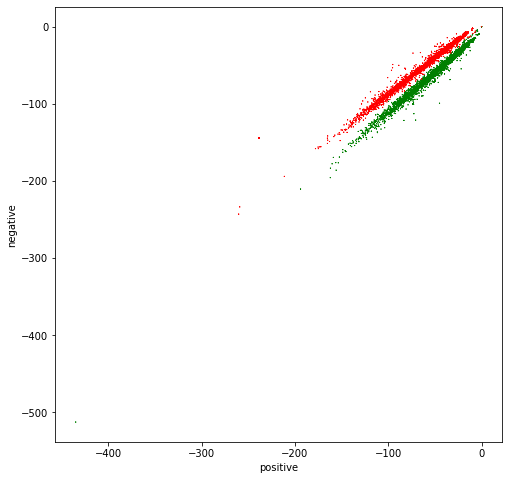

In [5]:
# plot scatter of positive and negative values

fig, ax = plt.subplots(figsize = (8,8))
colors = ['red', 'green']

ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s=0.1, marker='*');
plt.xlabel('positive');
plt.ylabel('negative');

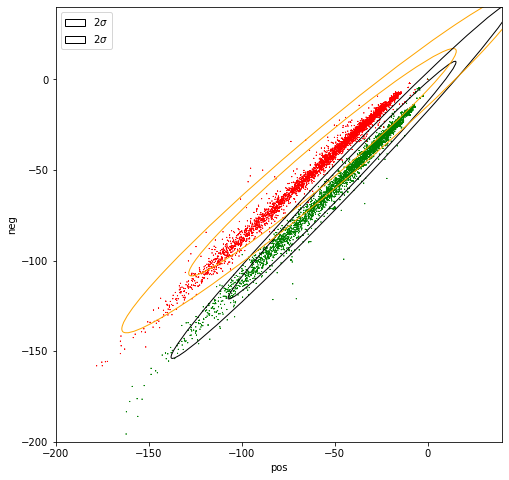

In [6]:
# Confidence ellipses to interpret naive bayes
# plot scatter of positive and negative values

fig, ax = plt.subplots(figsize = (8,8))
colors = ['red', 'green']

ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s=0.1, marker='*');
plt.xlabel('positive');
plt.ylabel('negative');

plt.xlim(-200,40);
plt.ylim(-200,40);

plt.xlabel('pos');
plt.ylabel('neg');

data_pos = data[data.sentiment == 1]
data_neg = data[data.sentiment == 0]

# ellipse for 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# for 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange')
ax.legend()
plt.show()

In [11]:
# modify the features with positive sentiment (1) so the two distributions overlap, so naive bayes will product a lower accuracy

data2 = data.copy()

data2.negative[data.sentiment == 1] = data2.negative * 1.5 + 50
data2.positive[data.sentiment == 1] = data2.positive / 1.5 - 50

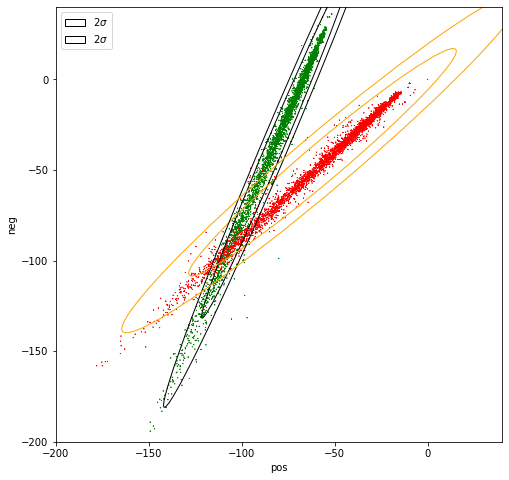

In [12]:
# plot the two distributions and the confidence ellipses

# Confidence ellipses to interpret naive bayes
# plot scatter of positive and negative values

fig, ax = plt.subplots(figsize = (8,8))
colors = ['red', 'green']

ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s=0.1, marker='*');
plt.xlabel('positive');
plt.ylabel('negative');

plt.xlim(-200,40);
plt.ylim(-200,40);

plt.xlabel('pos');
plt.ylabel('neg');

data_pos = data2[data2.sentiment == 1]
data_neg = data[data2.sentiment == 0]

# ellipse for 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# for 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange')
ax.legend()
plt.show()